In [1]:
# required library
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# library to ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Scrape tweets for the hashtag #datascience

# PROBLEM STATEMENT - 1

In [3]:
import tweepy

consumer_key = "0p0FonTDUYemNfPg8epMh6kFO"
consumer_secret = "wPe8tcxhP63cseioDcWeOkj77SdWrNMaXJPQUz2QzKO8LscL25"
access_token = "991382693945360386-doRMFJghJAPN9Krhqc5tSdu6fU9fuby"
access_token_secret = "xYfzST5UEPDz0WGBUTnEdRCczVk4qSGTt7uKcO2at5iJU"

In [4]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [5]:
df_tweets = pd.DataFrame()
for tw in tweepy.Cursor(api.search, "#datascience",lang="en").items(501):
    curr_tweet = {"display_name":tw.user.name,"created_at":tw.created_at,"Text":tw.text}
    df_tweets = df_tweets.append(curr_tweet,ignore_index=True)

In [6]:
df_tweets.head()

,Text,created_at,display_name
0,RT @wil_bielert: RT @gp_pulipaka: TensorFlow 2...,2019-10-02 08:00:48,GentooBot
1,"Hey! Check out this service... October 01, 201...",2019-10-02 08:00:45,Top Tech Hits
2,With industry adopting more state-of-the-art m...,2019-10-02 08:00:35,Analytics India Mag
3,Understanding Neural Networks. From neuron to ...,2019-10-02 08:00:19,Deep_In_Depth
4,RT @BigData_Fr: Sleeping beauty...\n#Brisbane ...,2019-10-02 08:00:08,RobotConsumer


###  1. Hour wise or minute wise (depending upon the scrapped tweets) number of tweets-draw a line chart. 

In [7]:
#creating a column called minutes from created at column
df_tweets["minutes"] = df_tweets["created_at"].dt.minute

tweet_min = df_tweets.groupby("minutes")["Text"].size().reset_index()
tweet_min = tweet_min.rename(columns={"Text":"tweet_count"})
tweet_min.head()

,minutes,tweet_count
0,0,10
1,1,2
2,2,1
3,3,11
4,4,3


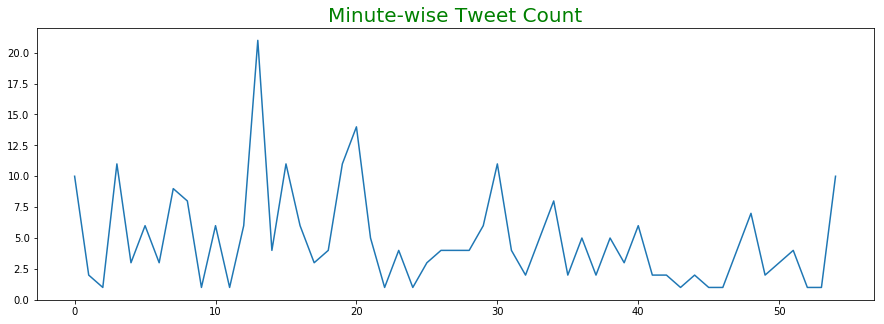

In [8]:
plt.rcParams["figure.figsize"]=15,5
plt.plot(tweet_min["tweet_count"])
plt.title("Minute-wise Tweet Count",color="g",fontsize=20)
plt.show()

## 2. Top ten users with more number of tweets??

In [9]:
top_twt = df_tweets.groupby("display_name")["Text"].size().reset_index()
top_twt = top_twt.rename(columns={"display_name":"user_name","Text":"tweet_count"})
top_twt = top_twt.sort_values(by="tweet_count",ascending=False).head(10)#Top 10 tweet based on user
top_twt

,user_name,tweet_count
12,Artificial Intelligence,14
25,Data Scientists,11
9,Analytics France,10
14,Big Data Analytics,10
16,Calvin and Hobbes,8
21,Curious Luke,8
111,"Wilhelm Bielert, PhD",6
119,jayeshthakur,6
129,🇿🇦 Wynand Booysen 💻 改善,5
28,David Sobo,5


## 3. Create a new column in the data itself, to identity total number of hashtags in each tweet??

In [10]:
df_tweets.Text[0]

'RT @wil_bielert: RT @gp_pulipaka: TensorFlow 2.0 is Now Available! #BigData #Analytics #DataScience #AI #MachineLearning #IoT #IIoT #PyTorc…'

In [11]:
# find tweet that start with #tag and take the length of it to find no of hash tag in each tweet
hash_cnt_list = []
for i in range(len(df_tweets)):
    hash_cnt_list.append(len(re.findall("#\w+",df_tweets.Text[i])))

#creating a new column hashtags count 
df_tweets["hashtags_count"] = hash_cnt_list 
df_tweets.head()#printing first 5 rows of it

,Text,created_at,display_name,minutes,hashtags_count
0,RT @wil_bielert: RT @gp_pulipaka: TensorFlow 2...,2019-10-02 08:00:48,GentooBot,0,8
1,"Hey! Check out this service... October 01, 201...",2019-10-02 08:00:45,Top Tech Hits,0,1
2,With industry adopting more state-of-the-art m...,2019-10-02 08:00:35,Analytics India Mag,0,2
3,Understanding Neural Networks. From neuron to ...,2019-10-02 08:00:19,Deep_In_Depth,0,1
4,RT @BigData_Fr: Sleeping beauty...\n#Brisbane ...,2019-10-02 08:00:08,RobotConsumer,0,10


## 4. Identity those users who have used #datascience as well as #machinelearning.Plot a bar chart of such top 10 users??

In [12]:
# filtering dataframe where for single user datascience and machine learning hashtags is present
dsc_mlearn_user = df_tweets[df_tweets.Text.str.contains("#datascience") & df_tweets.Text.str.contains("#machinelearning")]
dsc_mlearn_user

,Text,created_at,display_name,minutes,hashtags_count
75,RT @BigData_Fr: How automation speeds up data ...,2019-10-02 07:36:33,Thomas Hilbig 2.0,36,7
93,This 10-page #datascience cheat-sheet covers #...,2019-10-02 07:31:53,CuriousSquid,31,2
119,RT @BigData_Fr: Word(s) of the day: Artificial...,2019-10-02 07:27:37,FINTECHNA,27,3
167,RT @dataiku: AI helps in basketball strategy. ...,2019-10-02 07:18:09,Curious Luke,18,6
168,RT @dataiku: AI helps in basketball strategy. ...,2019-10-02 07:17:51,Romain Vallee,17,6
180,RT @dataiku: AI helps in basketball strategy. ...,2019-10-02 07:16:27,Aaron Cuddeback,16,6
241,RT @dataiku: AI helps in basketball strategy. ...,2019-10-02 07:06:38,Siegfried Löffler,6,6
242,RT @dataiku: AI helps in basketball strategy. ...,2019-10-02 07:06:16,Alexey Moiseyev,6,6


In [13]:
# checking wheather both keywords present or not
df_tweets["Text"][183]

'RT @AIVids: 🇺🇸 #How to Fit Artificial Intelligence into Manufacturing, Part 2 - Machine Design https://t.co/l9kL1TJCoS ⬇️ #Robotics ⬇️ #Dat…'

In [14]:
dsc_mlearn_user = dsc_mlearn_user.groupby("display_name")["Text"].size().reset_index()#.plot(kind="bar",color=[["blue","green"]])

dsc_mlearn_user

,display_name,Text
0,Aaron Cuddeback,1
1,Alexey Moiseyev,1
2,Curious Luke,1
3,CuriousSquid,1
4,FINTECHNA,1
5,Romain Vallee,1
6,Siegfried Löffler,1
7,Thomas Hilbig 2.0,1


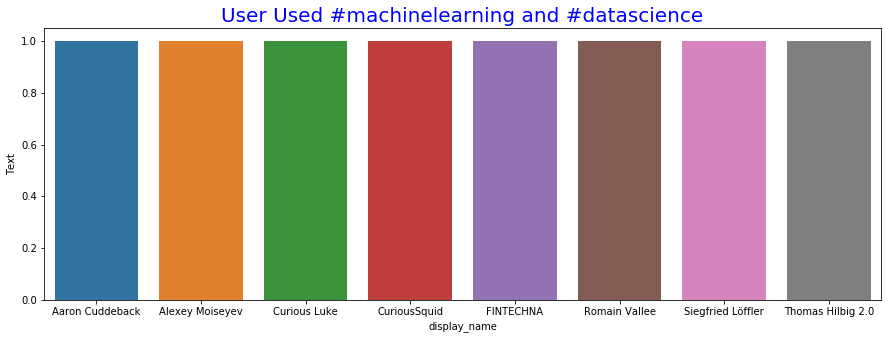

In [15]:
sns.barplot(dsc_mlearn_user["display_name"],dsc_mlearn_user["Text"])
plt.title("User Used #machinelearning and #datascience",color="b",fontsize=20)
plt.show()

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# PROBLEM STATEMENT - 2

In [16]:
#reading tweet csv file
modi = pd.read_csv("narendramodi_tweets.csv")
modi.head(3)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.260000e+17,1406,4903,31-01-2017 11:00,The President's address wonderfully encapsulat...,en,False,26809964,1641,1,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.260000e+17,907,2877,31-01-2017 10:59,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.260000e+17,694,0,31-01-2017 10:52,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [17]:
modi.shape

(2987, 14)

In [18]:
modi_text = modi[["text"]]
modi_text["text"][5]

'RT @PMOIndia: Financial inclusion for poverty alleviation. https://t.co/5xT2ZyhHTE'

In [19]:
#(https?:\/\/) matches http:// or https://
import re
text = re.sub(r'https?:\/\/.*', '', modi_text["text"][5])
text

'RT @PMOIndia: Financial inclusion for poverty alleviation. '

# Text Cleaning

In [20]:
# iterating all rows and appending text in list  by removing http tag
lst =[]
for i in range(len(modi_text)):
    #print(i)
    lst.append(re.sub(r'https?:\/\/.*', '', modi_text["text"][i]))

In [21]:
#creating a new column where text will be without http tag
modi_text["clean_text"] = lst
modi_text.head()

,text,clean_text
0,The President's address wonderfully encapsulat...,The President's address wonderfully encapsulat...
1,Rashtrapati Ji's address to both Houses of Par...,Rashtrapati Ji's address to both Houses of Par...
2,RT @PMOIndia: Empowering the marginalised. htt...,RT @PMOIndia: Empowering the marginalised.
3,RT @PMOIndia: Commitment to welfare of farmers...,RT @PMOIndia: Commitment to welfare of farmers.
4,RT @PMOIndia: Improving the quality of life fo...,RT @PMOIndia: Improving the quality of life fo...


In [22]:
# function to remove RT @PMOIndia: 
def fun(x):
    if ":" in x:
        return x.split(":")[1]
    else:
        return x
    
modi_text["clean_text"] = modi_text["clean_text"].apply(fun)
modi_text.head()

,text,clean_text
0,The President's address wonderfully encapsulat...,The President's address wonderfully encapsulat...
1,Rashtrapati Ji's address to both Houses of Par...,Rashtrapati Ji's address to both Houses of Par...
2,RT @PMOIndia: Empowering the marginalised. htt...,Empowering the marginalised.
3,RT @PMOIndia: Commitment to welfare of farmers...,Commitment to welfare of farmers.
4,RT @PMOIndia: Improving the quality of life fo...,Improving the quality of life for the poor.


# Get Sentiment-Score

In [23]:
# takign the clean text column
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#creating object called sentiment
sentiment = SentimentIntensityAnalyzer()

new_text = modi_text[["clean_text"]]


In [24]:
new_text["clean_text"]=new_text["clean_text"].str.replace("#","")

In [25]:
sentiment.polarity_scores(new_text["clean_text"][0])["compound"]

0.765

In [26]:
score_list = []
for i in range(len(new_text)):
    score = sentiment.polarity_scores(new_text["clean_text"][i])["compound"]
    score_list.append(score)
# lets have a look on first 5 score from the appended list    
score_list[:5]        

[0.765, 0.0, 0.0, 0.3818, -0.0772]

In [27]:
#create new column for sentiment score
new_text["sent_score"] = score_list

#print head of it
new_text.head()

,clean_text,sent_score
0,The President's address wonderfully encapsulat...,0.7650
1,Rashtrapati Ji's address to both Houses of Par...,0.0000
2,Empowering the marginalised.,0.0000
3,Commitment to welfare of farmers.,0.3818
4,Improving the quality of life for the poor.,-0.0772


- Positive (score > 0.05)
- Negative (score < -0.05)
- Neutral (-0.05 <= score <= 0.05)


In [28]:
# defining a function which will classify sent_score into 3 classes
def Score_Class(y):
    if y > 0.05:
        return "Positive"
    elif y < -0.05:
        return "Negative"
    else:
        return "Neutral"
    
# applying this function to score column
new_text["class"] = new_text["sent_score"].apply(Score_Class)

# print few rows 
new_text.head(4)

,clean_text,sent_score,class
0,The President's address wonderfully encapsulat...,0.7650,Positive
1,Rashtrapati Ji's address to both Houses of Par...,0.0000,Neutral
2,Empowering the marginalised.,0.0000,Neutral
3,Commitment to welfare of farmers.,0.3818,Positive


# •	Create a multi-line chart for comparing no. of positive, negative and neutral reviews for each day.

In [29]:
multi_chart = modi[["created_at"]]

multi_chart["class"] = new_text["class"]
multi_chart["clean_text"] = new_text["clean_text"]

In [30]:
#converting created_at column to datetime
multi_chart["created_at"]=pd.to_datetime(multi_chart["created_at"])
multi_chart.dtypes

created_at    datetime64[ns]
class                 object
clean_text            object
dtype: object

In [31]:
#extracting day from the date column
multi_chart["day"] = multi_chart["created_at"].dt.day_name()
multi_chart.head()

,created_at,class,clean_text,day
0,2017-01-31 11:00:00,Positive,The President's address wonderfully encapsulat...,Tuesday
1,2017-01-31 10:59:00,Neutral,Rashtrapati Ji's address to both Houses of Par...,Tuesday
2,2017-01-31 10:52:00,Neutral,Empowering the marginalised.,Tuesday
3,2017-01-31 10:52:00,Positive,Commitment to welfare of farmers.,Tuesday
4,2017-01-31 10:52:00,Negative,Improving the quality of life for the poor.,Tuesday


In [32]:
multi_chart_group = multi_chart.groupby(["day","class"])["clean_text"].size().reset_index()
multi_chart_group.head()

,day,class,clean_text
0,Friday,Negative,31
1,Friday,Neutral,93
2,Friday,Positive,237
3,Monday,Negative,33
4,Monday,Neutral,109


# multiline chart

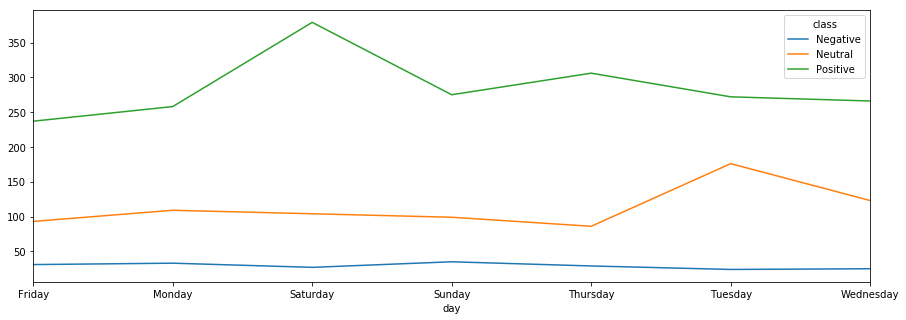

In [33]:
#drawing multiline chart
multi_chart.groupby(["day","class"]).count()["clean_text"].unstack().plot()
plt.show()

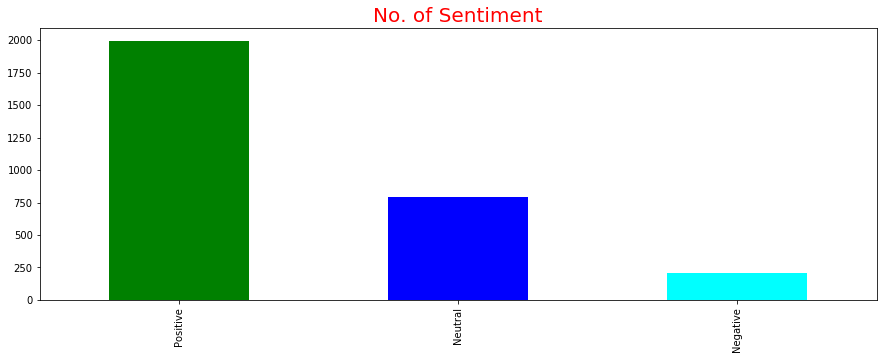

In [34]:
#Lets do count of class
new_text["class"].value_counts().plot(kind="bar",color=["g","b","cyan"])
plt.title("No. of Sentiment",fontsize=20,color="r")
plt.show()

# DTM matrix creation

In [35]:
#lib to convert text to DTM matrix
from sklearn.feature_extraction.text import CountVectorizer
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(new_text["clean_text"],new_text["class"],test_size=0.2)

x_train.shape,x_val.shape,y_train.shape,y_val.shape

((2389,), (598,), (2389,), (598,))

In [36]:
# fitting vectorized object to the data
vectorizer = CountVectorizer(min_df = 5).fit(x_train)
train_dtm = vectorizer.transform(x_train)
val_dtm = vectorizer.transform(x_val)
train_dtm

<2389x1196 sparse matrix of type '<class 'numpy.int64'>'
	with 28469 stored elements in Compressed Sparse Row format>

# Naïve Bayes Model

In [37]:
# building Naive Byes model and calculating the accuracy score
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train_dtm,y_train)

validate_pred = model.predict(val_dtm)

from sklearn.metrics import accuracy_score
accuracy_score(y_val,validate_pred)

0.7675585284280937

# •	Classify the following tweet: 
- “India is a great country. It has one of the oldest civilizations. It has its own heritage culture. People from different caste, creed, religion, speaking different languages stay together. However, with all the political parties trying to get votes, India has seen various caste or religion-based riots and protests.”


In [38]:
y_val[:5]

789      Neutral
1332    Positive
944     Positive
2772    Negative
1491     Neutral
Name: class, dtype: object

In [39]:
validate_pred[:5]

array(['Positive', 'Positive', 'Positive', 'Positive', 'Neutral'],
      dtype='<U8')

In [40]:
#Given text for prediction
text = "India is a great country. It has one of the oldest civilizations. It has its own heritage culture. People from \
different caste, creed, religion, speaking different languages stay together. However, with all the political parties \
trying to get votes, India has seen various caste or religion-based riots and protests."

In [41]:
testing = vectorizer.transform([text])
prediction_result = model.predict(testing)

In [42]:
#our model has predicted the sentiment of the tweet is positive
prediction_result

array(['Positive'], dtype='<U8')

# +++++++++++++++++++++++++++++END++++++++++++++++++++++++++++